## Machine Learning selection (How to choose the right ML algorithm ?)

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Create classification dataset

In [10]:
from sklearn.datasets import make_classification

data = make_classification(n_samples=1000, n_features=10, n_classes=2)
df = pd.DataFrame(data[0], columns=["WTT", "PTI", "EQW", "SBI", "LQE", "QWG", "FDJ", "PJF", "HQE", "NXJ"])
df["Target"] = data[1]
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,Target
0,0.007655,-2.302922,0.016683,0.878461,0.274273,-0.694001,-0.776667,-0.090693,-0.403502,-1.703936,1
1,1.075784,-0.201876,1.069054,-1.498127,-0.891021,0.810350,0.618819,-1.097922,-0.797753,2.069812,0
2,-1.821061,-1.845848,0.759793,-1.275101,-0.001218,1.357292,1.789069,-0.175256,-0.642226,-0.993013,0
3,0.804003,2.513918,-0.504156,0.954809,1.141273,-0.010908,0.561599,-0.476147,-0.236402,-0.030018,1
4,-1.183957,0.713230,-0.764349,-1.438583,-0.624192,0.982178,0.980051,1.354724,0.139093,0.367388,0


### Visualise the data using pairplot
Pairplot shows you how are the individual features connected to each other and maybe tell you if you should use KNN or SVM or any other classifier.

- Are you able to use straight line to divide the points in any of graphs below to two different groups?

If your answer is yes, then you probably see a linear classification problem so you can use `Logistic Regression` or `SVM` to solve this problem. Otherwise you can use `KNN`, `Decision Tree` or `Random Forrest` to solve non-linear classification problems.

- Are your data overlappeing too much?

In this scenario, you should definnetelly use `KNN` algorithm which uses euclidean distance to determine the classification group of the point [viz. 10) KNN]. If this way doesn't work for you then you can use `Decision Tree` or `Random Forrest` but it will be more costly (time to train) than `KNN` algorithm.

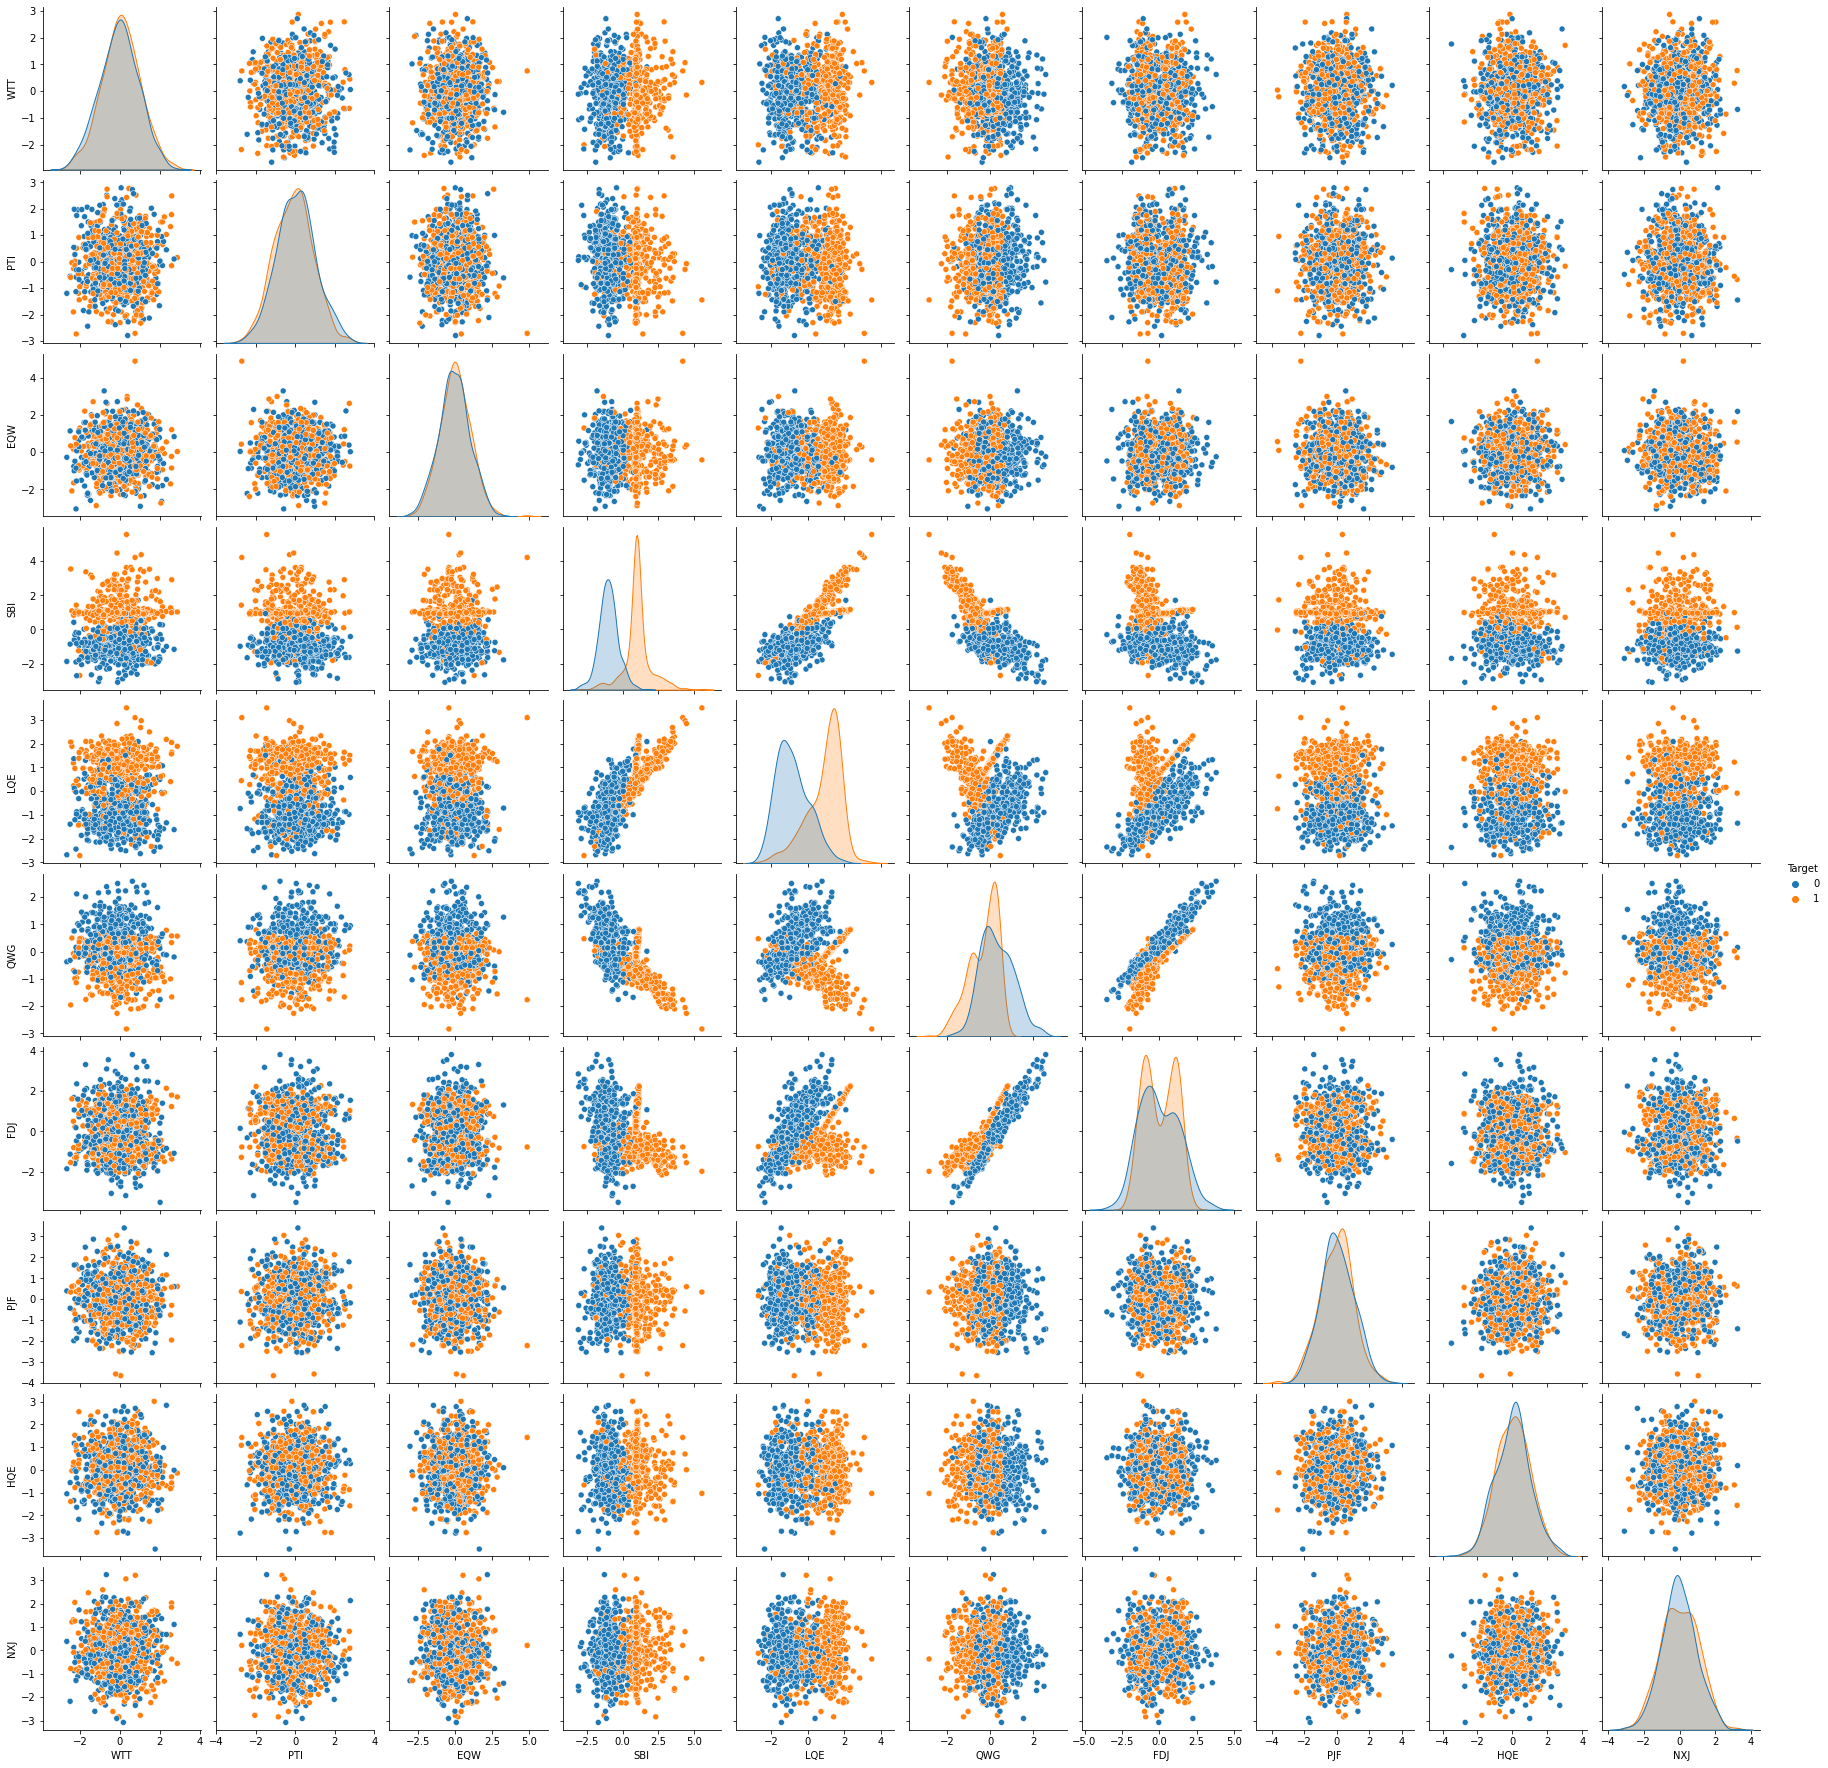

In [11]:
sn.pairplot(df, hue="Target")

### Feature selection

- Univariate Selection

- Feature Importance

- Correlation Matrix

Chi square, Anova test, Correlation coefficient

#### Univariate Selection

<AxesSubplot:xlabel='Specs', ylabel='Score'>

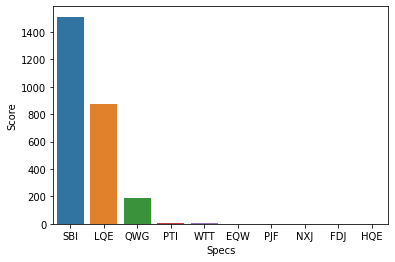

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Divide features and targets
y = df["Target"]
X = df.drop(["Target"], axis=1)

# Find the best features using statistical tests (chi2, f_classif, mutual_info_classif)
bestFeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestFeatures.fit(X, y)

# Save scores and Column names to Dataframe
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concat the dataframes to one
featureScores = pd.concat([df_columns, df_scores], axis=1)
featureScores.columns = ["Specs", "Score"]

# Plot the scores
sorted_features = featureScores.sort_values(by=["Score"], ascending=False)
sn.barplot(data=sorted_features, x="Specs", y="Score")

#### Feature Importance

<AxesSubplot:>

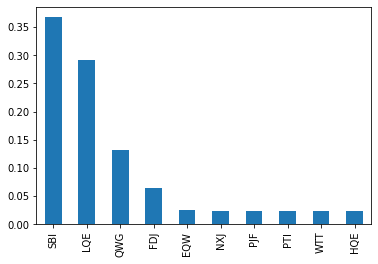

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="bar")

#### Correlation coefficients

<AxesSubplot:>

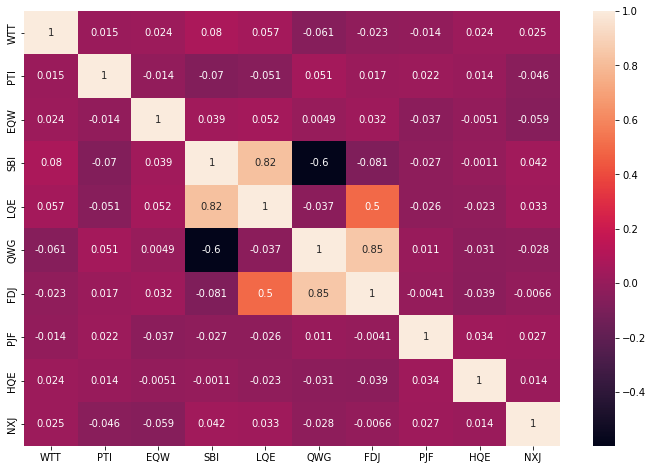

In [52]:
cm = df.drop(["Target"], axis=1).corr()
plt.figure(figsize=(12, 8))
sn.heatmap(data=cm, annot=True)